In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Use 'read_csv' to injest dataset.
movies = pd.read_csv('./Datasets/IMDB_Dataset.csv')
movies.shape

(5043, 28)

We have a dataset with over 5000 movies each with 28 features. Lets take a closer look at the features.

In [4]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

There are a lot of interesting features here, but to get started I want to take a closer look at the 'imdb_score' and 'gross' features.

Startin with 'imdb_score' well check if there are any null values, drop the null values, veiw the descriptive statistic and plot the distribution on a histogram.

In [5]:
# Check for null values
movies['imdb_score'].isnull().any()

False

In [6]:
# View the descriptive statistics
movies['imdb_score'].describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

It appears that the moives are scored on a scale from 1 to 10, but no movie in this dataset has recieve the lowest score of 1 or a perfect score of 10. Lets plot this scores to get a better visulization of how the scores are distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF15AE13C8>]],
      dtype=object)

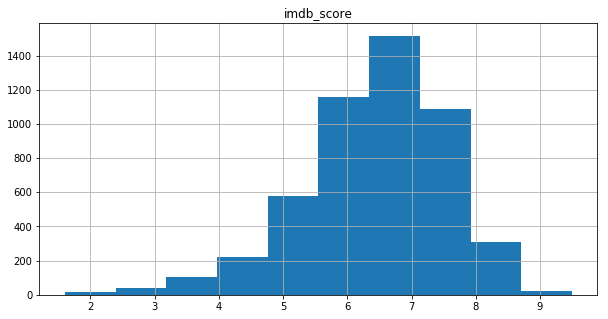

In [7]:
# Plot 
movies.hist(column='imdb_score', figsize=(10,5))

It looks like most movies are scored between 6 and 7. Not very many movie score an 8 or better.

Lets continue on with the 'gross' feature.

In [8]:
# Check for missing values.
movies['gross'].isnull().any()

True

In [9]:
# Drop the missing values.
movies.dropna(inplace=True, subset=['gross'])

In [10]:
movies['gross'].describe()

count    4.159000e+03
mean     4.846841e+07
std      6.845299e+07
min      1.620000e+02
25%      5.340988e+06
50%      2.551750e+07
75%      6.230944e+07
max      7.605058e+08
Name: gross, dtype: float64

We have a min value of 162 and a max value of 760,505,800 with the average movie grossing 48,468,410.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF16409BE0>]],
      dtype=object)

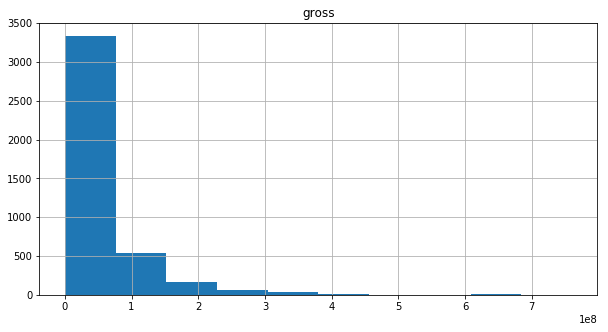

In [11]:
# Plot 
movies.hist(column='gross', figsize=(10,5))

We can see very few movies gross above $100,000. I wanna see if there are any movie genres that preform better at the box office and/or have better IMBD scores than others. We'll start by looking at the movie genres and selcting a few we want to analyze.

In [12]:
movies["genres"].head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
5            Action|Adventure|Sci-Fi
Name: genres, dtype: object

Values are seperated by '|' lets go ahead and take the genres and put them in a list so we can see all of the possible genres.

In [13]:
genres = list(set([genre for row in movies['genres'] for genre in row.split('|')]))
print(genres)

['Sci-Fi', 'Fantasy', 'Western', 'Mystery', 'War', 'Film-Noir', 'Crime', 'Musical', 'History', 'Drama', 'Comedy', 'Action', 'News', 'Animation', 'Thriller', 'Music', 'Biography', 'Romance', 'Family', 'Documentary', 'Horror', 'Short', 'Adventure', 'Sport']


Im going to take a look at the 'Sci-Fi', 'Comedy' and 'Thriller' genres and see which ones preform better at the box. We'll start by creating a few filters.

In [14]:
scifi_filter = movies["genres"].str.contains("Sci-Fi")
comedy_filter = movies["genres"].str.contains("Comedy")
thriller_filter = movies["genres"].str.contains("Thriller")

Lets plot the imdb_scores of the three genres.

Text(0.5, 1.0, 'Thriller IMDB Scores')

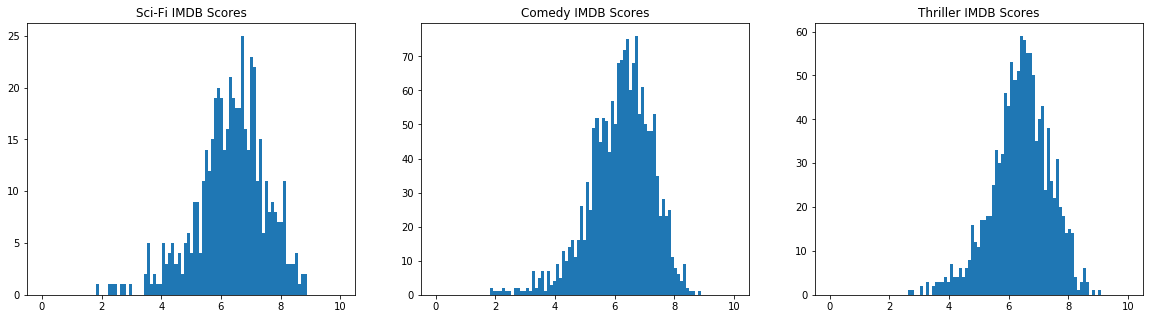

In [15]:
x1 = movies[scifi_filter]['imdb_score']
x2 = movies[comedy_filter]['imdb_score']
x3 = movies[thriller_filter]['imdb_score']

bins = np.linspace(0, 10, 100)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax.hist(x1, bins)
ax2.hist(x2, bins)
ax3.hist(x3, bins)

ax.set_title('Sci-Fi IMDB Scores')
ax2.set_title('Comedy IMDB Scores')
ax3.set_title('Thriller IMDB Scores')

They look similar but it kind of hard to tell when they are side by side so lets plot them all on one graph and take a look at the mean of them.

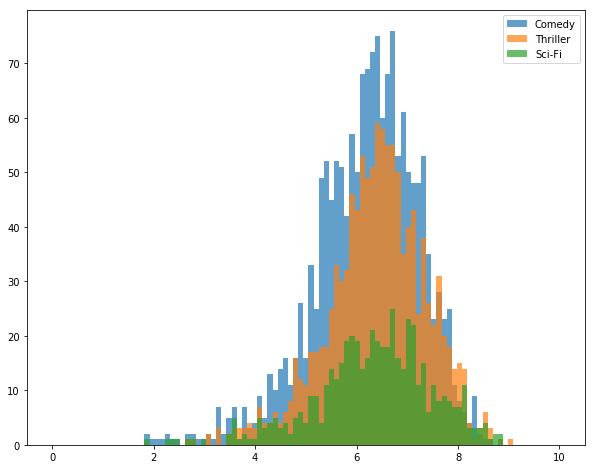

Average IMDB score of Sci-Fi movies:  6.3245579567779915
Average IMDB score of Comedy movies:  6.188300492610848
Average IMDB score of Thriller movies:  6.381041844577295


In [16]:
plt.figure(figsize=(10,8))
plt.hist(x2, bins, alpha=0.7, label='Comedy', range=(0,10))
plt.hist(x3, bins, alpha=0.7, label='Thriller', range=(0,10))
plt.hist(x1, bins, alpha=0.7, label='Sci-Fi', range=(0,10))
plt.legend(loc='upper right')
plt.show()

print('Average IMDB score of Sci-Fi movies: ', movies[scifi_filter]['imdb_score'].mean())
print('Average IMDB score of Comedy movies: ', movies[comedy_filter]['imdb_score'].mean())
print('Average IMDB score of Thriller movies: ', movies[thriller_filter]['imdb_score'].mean())

Even though the comedy and thriller genres have more movies than the sci-fi. Each genre has very close average scores. Lets see what percentage of each genre has scores above or equal to 8.

In [50]:
# Filter for movies >= 8
highly_rated = movies["imdb_score"] >= 8

print("Sci-Fi:", round(len(movies[highly_rated][scifi_filter]) / len(movies[scifi_filter])*100, 2), "%")
print("Comedy:", round(len(movies[highly_rated][comedy_filter]) / len(movies[comedy_filter])*100, 2), "%")
print("Thriller:", round(len(movies[highly_rated][thriller_filter]) / len(movies[thriller_filter])*100, 2), "%")

Sci-Fi: 7.07 %
Comedy: 1.97 %
Thriller: 4.1 %


C:\Users\Devon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Devon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Devon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Coming in at 7%, Sci-Fi has the highest precentage of movies that are rated 8 or better. Thriller is second with 4% and comdey is last with only 2% of film scoring an 8 or better.

Lets see which movie genre performs best at the box office. First we will look at the average gross of a movie from each genre then we will see what pecentage of each genres grosses over 100,000,000

In [45]:
print('Average gross of a Sci-Fi movies: ${:,.2f}'.format(movies[scifi_filter]['gross'].mean()))
print('Average gross of a Comedy movies: ${:,.2f}'.format(movies[comedy_filter]['gross'].mean()))
print('Average gross of a Thriller movies: ${:,.2f}'.format(movies[thriller_filter]['gross'].mean()))

Average gross of a Sci-Fi movies: $82,244,105.74
Average gross of a Comedy movies: $47,683,480.20
Average gross of a Thriller movies: $46,890,571.63


We can see that Comedy and Thriller genres come very close to the average gross for all movies of 48,468,410. Sci-Fi on the  other had is above, averaging about 82 million per movie. Why is this? Lets look at what pecentage of movies grosses over 100 million for each genre.

In [49]:
# Filter for movies >= 8
high_gross = movies["gross"] >= 100000000

print("Sci-Fi:", round(len(movies[high_gross][scifi_filter]) / len(movies[scifi_filter])*100, 2), "%")
print("Comedy:", round(len(movies[high_gross][comedy_filter]) / len(movies[comedy_filter])*100, 2), "%")
print("Thriller:", round(len(movies[high_gross][thriller_filter]) / len(movies[thriller_filter])*100, 2), "%")

Sci-Fi: 26.92 %
Comedy: 15.39 %
Thriller: 12.72 %


C:\Users\Devon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Devon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Devon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Over 25% of all Sci-Fi movies gross over 100 million. Where only 15% and 12% of Comedy and Thriller movies do.